In [24]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import glob
from PIL import Image

In [25]:

filelist = glob.glob('./train_medium_augmented/footway/*.jpg')
footpath = np.array([np.array(Image.open(fname)) for fname in filelist])
footpath_labels = np.zeros(len(footpath))

In [26]:
filelist = glob.glob('./train_medium_augmented/primary/*.jpg')
primary = np.array([np.array(Image.open(fname)) for fname in filelist])
primary_labels = np.ones(len(primary))

In [27]:
trainset = np.concatenate((footpath, primary), axis=0)
train_labels = np.concatenate((footpath_labels, primary_labels), axis=0)

In [28]:
print(trainset.shape)


(5000, 256, 256, 3)


In [29]:
fileslist = glob.glob('./val_augmented/footway/*.jpg')
footpath = np.array([np.array(Image.open(fname)) for fname in filelist])
footpath_labels = np.zeros(len(footpath))

In [30]:
filelist = glob.glob('./val_augmented/primary/*.jpg')
primary = np.array([np.array(Image.open(fname)) for fname in filelist])
primary_labels = np.ones(len(primary))

In [31]:
val_set = np.concatenate((footpath, primary), axis=0)
val_labels = np.concatenate((footpath_labels, primary_labels), axis=0)

In [35]:
print(val_set.shape)

(3120, 256, 256, 3)


In [48]:
train_data = []
for i in range(len(trainset)):
   train_data.append([trainset[i], train_labels[i]])

val_data = []
for i in range(len(val_set)):
    val_data.append([val_set[i], val_labels[i]])


In [49]:
print(train_data)

[[array([[[122, 129, 137],
        [135, 142, 150],
        [218, 225, 233],
        ...,
        [ 18,  23,  16],
        [ 14,  21,  13],
        [  1,   8,   0]],

       [[136, 143, 151],
        [169, 176, 184],
        [173, 180, 188],
        ...,
        [  8,  13,   6],
        [  6,  13,   5],
        [ 17,  24,  16]],

       [[158, 165, 173],
        [171, 178, 186],
        [162, 169, 177],
        ...,
        [ 20,  25,  18],
        [ 17,  24,  16],
        [ 10,  17,   9]],

       ...,

       [[100, 106, 106],
        [ 84,  90,  90],
        [ 81,  87,  87],
        ...,
        [  6,   8,   7],
        [ 12,  14,  13],
        [ 17,  19,  18]],

       [[ 99, 105, 105],
        [ 96, 102, 102],
        [ 83,  89,  89],
        ...,
        [  2,   4,   3],
        [  5,   7,   6],
        [ 12,  14,  13]],

       [[ 61,  67,  67],
        [ 59,  65,  65],
        [ 99, 105, 105],
        ...,
        [ 25,  27,  26],
        [ 12,  14,  13],
        [  0,   1,   0

In [50]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

classes = ('footway', 'primary')

In [51]:
print(len(trainloader))
print(len(testloader))

1250
780


[tensor([[[[186, 198, 210],
          [181, 193, 205],
          [178, 190, 202],
          ...,
          [ 32,  30,  31],
          [ 33,  31,  32],
          [ 30,  28,  29]],

         [[177, 189, 201],
          [173, 185, 197],
          [173, 185, 197],
          ...,
          [ 24,  22,  23],
          [ 23,  21,  22],
          [ 19,  17,  18]],

         [[179, 191, 203],
          [175, 187, 199],
          [174, 186, 198],
          ...,
          [ 25,  23,  24],
          [ 26,  24,  25],
          [ 23,  21,  22]],

         ...,

         [[ 26,  25,  33],
          [ 25,  24,  32],
          [ 39,  37,  48],
          ...,
          [ 34,  34,  34],
          [ 51,  51,  51],
          [ 52,  52,  52]],

         [[ 29,  27,  38],
          [ 33,  31,  42],
          [ 55,  53,  66],
          ...,
          [ 43,  43,  43],
          [ 55,  55,  55],
          [ 50,  50,  50]],

         [[ 29,  27,  38],
          [ 30,  28,  41],
          [ 44,  42,  55],
        

TypeError: Invalid shape (260, 22, 256) for image data

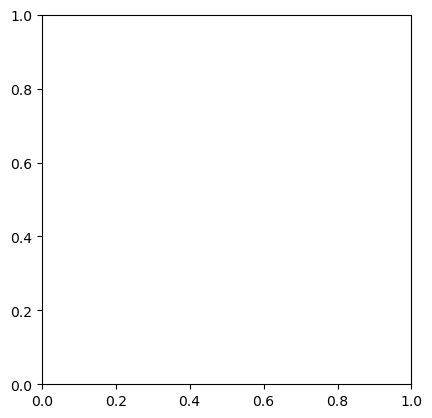

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
print(next(dataiter))
print(len(next(dataiter)))
images, labels = next(dataiter)
print(labels)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))